# Support Vector Machines

### Introduction

In the first part of this exercise, we will apply SVM to 2D Datasets, to see the effects of changing the features and the C and sigma parameters. Then, in the second part, we will use SVMs to build a spam classifier.

## Support Vector Machines

### Dataset 1 - SVM with linear kernel

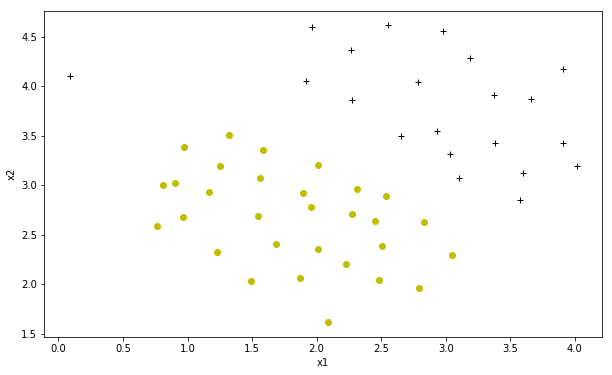

In [122]:
import scipy.io
import matplotlib.pyplot as plt
% matplotlib inline

def plotData(pos, neg):
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+')
    plt.plot(neg[:,0],neg[:,1],'yo')
    plt.xlabel('x1')
    plt.ylabel('x2')

    
mat = scipy.io.loadmat('ex6data1.mat')
x = mat['X']
y = mat['y'].reshape(-1,1).ravel()
pos = x[y == 1]
neg = x[y == 0]

plotData(pos, neg)
plt.show()

We can see that there are two lineary separable data, but with an outlier in the left. We will see how the SVM (with a linear kernel) creates the decision boundary giving some parameter C.

In [123]:
import numpy as np

def plot_linear_boundary(theta0, theta1, theta2, title):
    x1 = np.linspace(0,100, 1)
    x2 = np.linspace(0,100, 1)
    yy = []
    boundary_xs = np.array([np.min(x[:,0]), np.max(x[:,1])])
    boundary_ys = (-1./theta2)*(theta0 + theta1*boundary_xs)
    plotData(pos, neg)
    plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
    plt.legend()
    plt.title(title)
    plt.show()

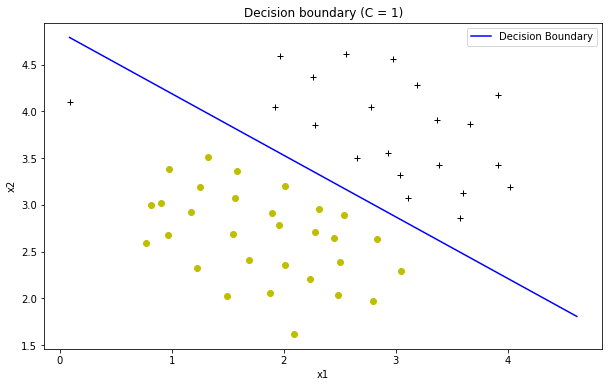

In [124]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='linear')
svm.fit(x,y)

theta0 = svm.intercept_[0]
theta1 = svm.coef_[:,0][0]
theta2 = svm.coef_[:,1][0]

plot_linear_boundary(theta0, theta1, theta2, 'Decision boundary (C = 1)')

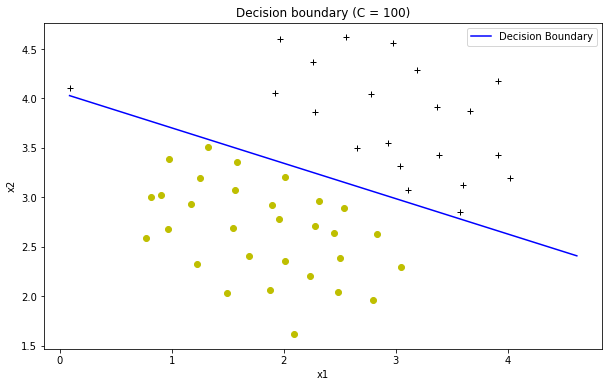

In [125]:
svm = SVC(C=100, kernel='linear')
svm.fit(x,y)

theta0 = svm.intercept_[0]
theta1 = svm.coef_[:,0][0]
theta2 = svm.coef_[:,1][0]

plot_boundary(theta0, theta1, theta2, 'Decision boundary (C = 100)')

As we can see, with C equal to 1, the SVM isn't affected by the outlier (correctly misclassifying it), where with C equal to 100 it adjusts the curve so the outlier is included (which represents a overfitting of the data).

### Dataset 2 - SVM with gaussian kernel

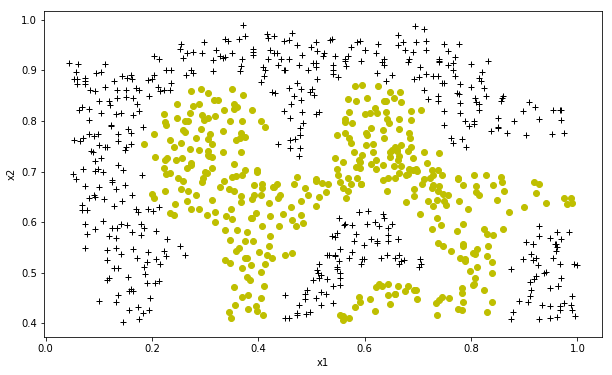

In [126]:
mat = scipy.io.loadmat('ex6data2.mat')
x = mat['X']
y = mat['y'].reshape(-1,1).ravel()
pos = x[y == 1]
neg = x[y == 0]

plotData(pos, neg)
plt.show()

In this situation, we have a more complicated dispersion of data, which needs a non linear decision boundary. This will be done by applying a SVM with a gaussian kernel.

In the example in Octave, we used sigma = 0.01. In SVC, the kernel is written a little bit different, with a parameter gamma equals to 1 / (sigma ^ 2). Because of this we will use a gamma value of 100.

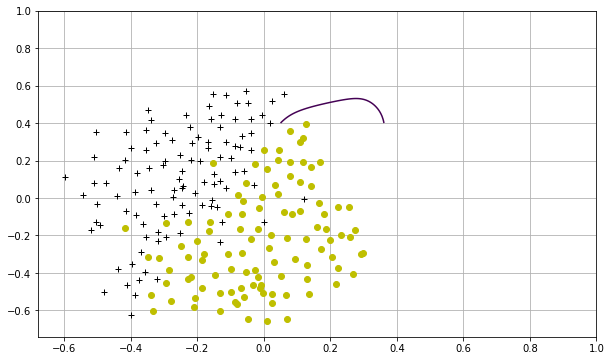

In [164]:
def plot_countour(model, pos, neg):
    test1 = np.linspace(0, 1, 250)
    test2 = np.linspace(0.4, 1, 250)
    z = np.empty((250,250))

    for i in range(len(test1)):
        for j in range(len(test2)):
            array = np.array([test1[i], test2[j]]).reshape(1,-1)
            z[i][j] = model.decision_function(array)
    
    z = np.transpose(z)
    xx,yy = np.meshgrid(test1,test2)

    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+')
    plt.plot(neg[:,0],neg[:,1],'yo')
    plt.contour(xx,yy,z, [0])
    plt.grid(True)
    plt.show()

svm = SVC(C=1, kernel='rbf', gamma=100)
svm.fit(x,y)
pos = x[y == 1]
neg = x[y == 0]
plot_countour(svm, pos, neg)

### Dataset 3 - SVM with cross validation

In this example, we have the data divided into two datasets: training (x and y) and cross validation (x_val, y_val). We will traing the model into the training set and then validate the parameters (C and gamma) into the cross validation set, searching for the lowest error.

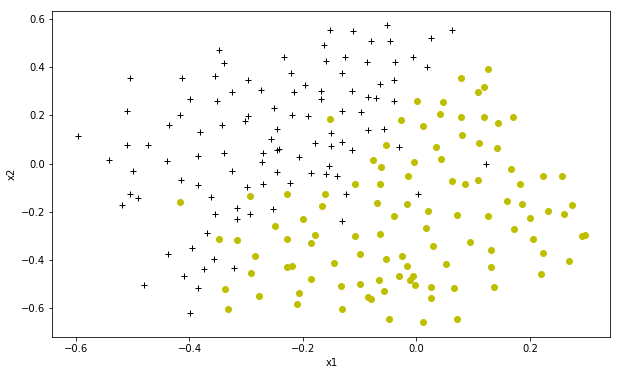

In [139]:
mat = scipy.io.loadmat('ex6data3.mat')
x = mat['X']
y = mat['y'].reshape(-1,1).ravel()
x_val = mat['Xval']
y_val = mat['yval'].reshape(-1,1).ravel()
pos = x[y == 1]
neg = x[y == 0]

plotData(pos, neg)
plt.show()

In [160]:
C_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamma_list = [0.01**-2, 0.03**-2, 0.1**-2, 0.3**-2, 1**-2, 3**-2, 10**-2, 30**-2]
smallest_error = 1000

for C in C_list:
    for gamma in gamma_list:
        svm = SVC(C=C, kernel='rbf', gamma=gamma)
        svm.fit(x,y)
        error = svm.score(x_val, y_val)
        if error < smallest_error:
            smallest_error = error
            best_C = C
            best_gamma = gamma

print('With C as {} and gamma as {}, we obtain an error of {}'.format(best_C, best_gamma, smallest_error))


With C as 0.01 and gamma as 10000.0, we obtain an error of 0.435


c:\users\luiz\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


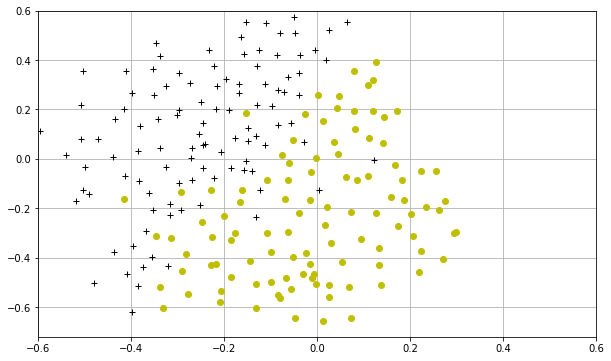

In [163]:
svm = SVC(C=0.01, kernel='rbf', gamma=1000)
svm.fit(x,y)
pos = x[y == 1]
neg = x[y == 0]
plot_countour(svm, pos, neg)